In [1]:
from openpyxl import load_workbook
import pandas as pd

wb = load_workbook("Birth_Rate.xlsx")
ws = wb.active

wb1 = load_workbook("Mortality Rate.xlsx")
ws1 = wb1.active

wb2 = load_workbook("Population.xlsx")
ws2 = wb2.active

year = []
for i in range(2, 25):
    year.append(ws.cell(column=i, row=3).value)

birth_rate = []
for i in range(2, 25):
    birth_rate.append(ws.cell(column=i, row=4).value)

Mortality_Rate = []
for i in range(3, 26):
    Mortality_Rate.append(ws1.cell(column=i, row=4).value)

population = []
for i in range(2, 25):
    population.append(ws2.cell(column=i, row=5).value + ',000')

def calculate_Mortality_Rate(Mortality_Rate, population):
    return (Mortality_Rate / population) * 1000

data = {'Year': year,
        'birth_rate': birth_rate,
        'Mortality_Rate': Mortality_Rate,
        'population': population}

df = pd.DataFrame(data)


df['Mortality_Rate'] = pd.to_numeric(df['Mortality_Rate'].str.replace(',', ''))
df['population'] = pd.to_numeric(df['population'].str.replace(',', ''))
df['Mortality_Rate'] = df.apply(lambda row: calculate_Mortality_Rate(row['Mortality_Rate'], row['population']), axis=1)
df

,Year,birth_rate,Mortality_Rate,population
0,2000,1.48,5.291440,47008000
1,2001,1.31,5.146992,47370000
2,2002,1.18,5.195173,47645000
3,2003,1.19,5.146225,47892000
4,2004,1.16,5.120729,48083000
5,2005,1.09,5.102708,48185000
6,2006,1.13,5.040712,48438000
7,2007,1.26,5.062895,48684000
8,2008,1.19,5.017083,49055000
9,2009,1.15,5.008153,49308000


C:\Users\dbdn1\AppData\Local\Temp\ipykernel_19132\1644800802.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
C:\Users\dbdn1\AppData\Local\Temp\ipykernel_19132\1644800802.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df['Year'], rotation=45, ha='right')


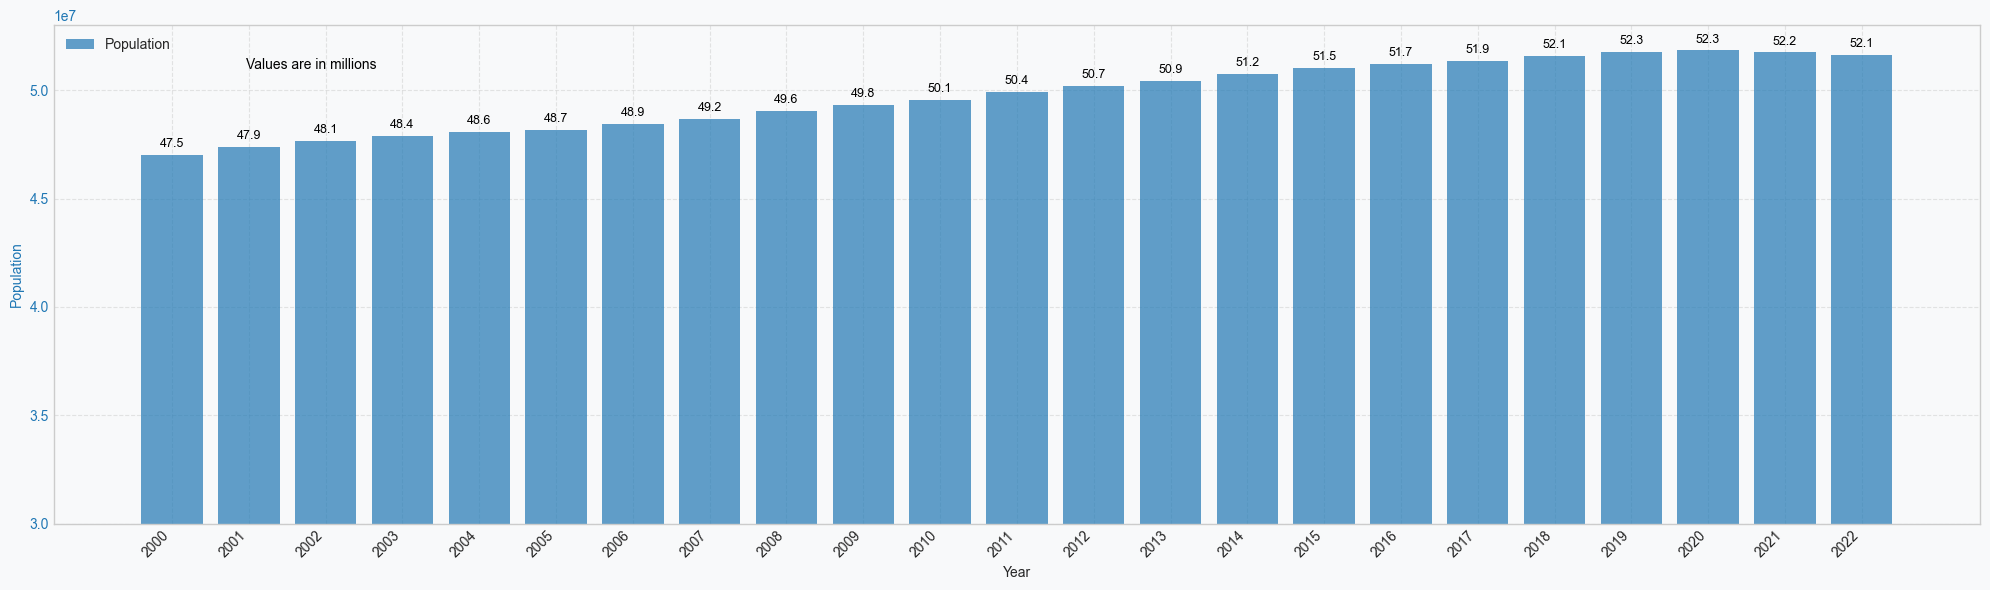

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')

fig, ax1 = plt.subplots(figsize=(20, 6))
color_population = 'tab:blue'

bars = ax1.bar(df['Year'], df['population'], color=color_population, alpha=0.7, label='Population')
ax1.set_xlabel('Year')
ax1.set_ylabel('Population', color=color_population)
ax1.tick_params(axis='y', labelcolor=color_population)
ax1.set_xticklabels(df['Year'], rotation=45, ha='right')  
ax1.set_ylim(30000000, 53000000)  
ax1.legend(loc='upper left')

for bar in bars:
    yval = bar.get_height() + 500000  
    yval_rounded = round(yval / 1e6, 1) 
    ax1.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval_rounded:.1f}', ha='center', va='center', color='black', fontsize=9)

ax1.text(0.1, 0.92, 'Values are in millions', transform=ax1.transAxes, fontsize=10, color='black', ha='left', va='center')

ax1.grid(True, linestyle='--', alpha=0.5)
ax1.set_facecolor('#f8f9fa')
fig.set_facecolor('#f8f9fa')
ax1.tick_params(axis='x', which='both', bottom=False)
fig.tight_layout()

plt.show()


### bar graph for populations

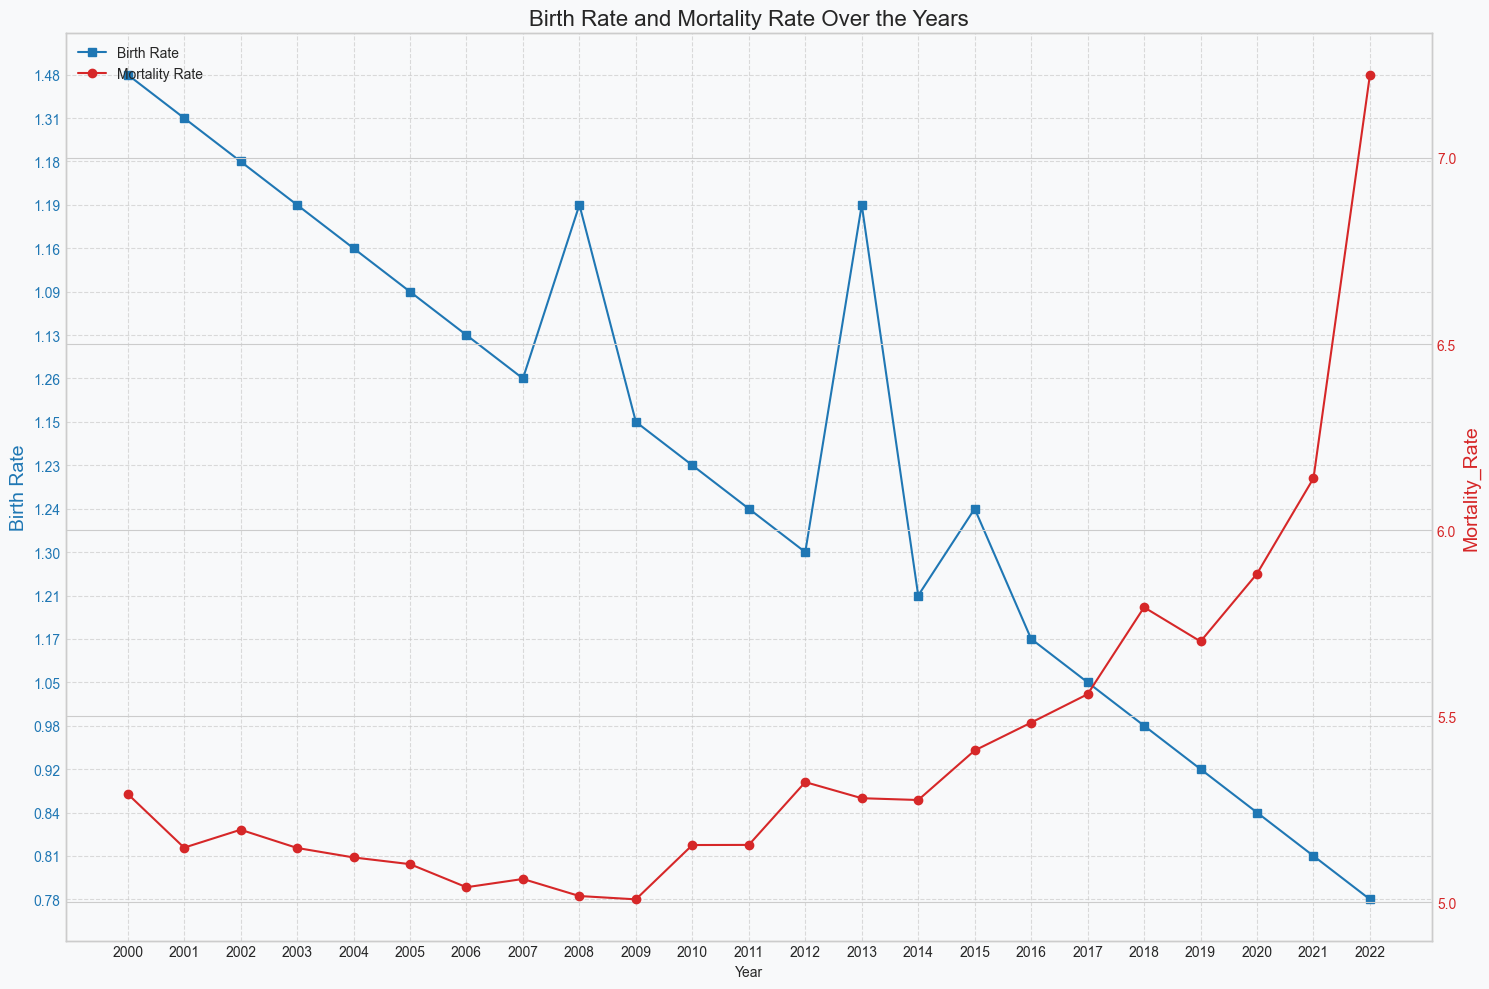

In [3]:
import pandas as pd
import matplotlib.pyplot as plt


fig, ax1 = plt.subplots(figsize=(15, 10))
color_1 = 'tab:blue'
color_2 = 'tab:red'


ax1.set_title('Birth Rate and Mortality Rate Over the Years', fontsize=16)
ax1.set_xlabel('Year')
ax1.set_ylabel('Birth Rate', fontsize=14, color=color_1)
ax1.plot(df['Year'], df['birth_rate'], marker='s', color=color_1, label='Birth Rate')
ax1.tick_params(axis='y', labelcolor=color_1)
ax1.invert_yaxis()


ax2 = ax1.twinx() 
ax2.set_ylabel('Mortality_Rate', fontsize=14, color=color_2)
ax2.plot(df['Year'], df['Mortality_Rate'], marker='o', color=color_2, label='Mortality Rate')
ax2.tick_params(axis='y', labelcolor=color_2)


lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

ax1.grid(True, linestyle='--', alpha=0.7)


ax1.set_facecolor('#f8f9fa')
ax2.set_facecolor('#f8f9fa')
fig.set_facecolor('#f8f9fa')

fig.tight_layout()
plt.show()


# Report on Birth Rate and Immigration Policy

## Introduction
Currently, South Korea is facing a severe decline in its birth rate, leading to population decrease. To address this issue, new policies and strategies are crucial. This report proposes the need for a reassessment of immigration policies based on the 2022 South Korea birth rate data and information on foreigners residing in the country.

## Decline in Birth Rate and Increase in Mortality Rate
Firstly, the birth rate in 2022 is recorded at 0.78, indicating an alarmingly low level that raises concerns about accelerated population decline and aging. The decline in birth rates not only poses various challenges to the nation's economy, society, and culture but is also linked to an increase in the mortality rate.

## Foreign Resident Numbers and Citizenship Acquisition
As of 2022, the total number of foreigners residing in South Korea is 2,258,428, with 1,752,346 of them not having acquired South Korean citizenship. The number of individuals acquiring South Korean citizenship is 223,825, and it is estimated that these individuals are permanently living in South Korea.

## Necessity for Reassessment of South Korea's Immigration Policy
Based on this data, it is proposed that immigration policies need to be reassessed to address the current decline in birth rates and the increase in mortality rates. Considering South Korea's relatively low immigrant population compared to other advanced countries, promoting the influx of foreigners, particularly those in the childbearing age group, is essential to boost the birth rate.

## Proposed Measures
1. **Enhancement of Immigration Attraction Policies:** Introduce benefits and support programs specifically targeting immigrants in the childbearing age group to stimulate their influx.

2. **Strengthening Multicultural Policies:** Enhance education and support programs for immigrant and multicultural families to promote social integration.

3. **Improvement of Visa and Residence Conditions:** Revise visa and residence conditions targeting women capable of childbirth to facilitate stable childbirth by foreign women in South Korea.

## Conclusion
The decline in birth rates leading to population decrease and the simultaneous increase in mortality rates pose negative implications for South Korea's sustained economic and social stability. Therefore, the reassessment of immigration policies is recognized as a practical and urgent task. To support childbirth and maintain domestic population levels, proactive policies promoting the influx of foreign immigrants are necessary.
